COMS21202: SPS, CW2

Initially, import the libraries needed.

In [47]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
%matplotlib inline

Taking a grayscale image, generate a colourmap for it.
Apply quantization to the image, done by representing a continuous function via a discrete one with quantization levels.

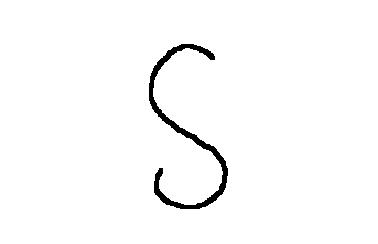

In [17]:
def gray2ind(img, levels=64):
  # this function assumes that the input image is grayscale with 256 colour levels
  if img.dtype != np.uint8 or len(img.shape) != 2:
    print( "Expected grayscale (2 dimensional) image of type uint8, got %d dimensional image of type %s." % (len(img.shape), str(img.dtype)) )
    raise

  # cast the image to double and scale to given level
  a = img/255
  a = a*(levels-1)
  a = a.round()
  a = np.uint8(a)

  # generate colourmap
  cm = np.repeat(np.linspace(0, 1, levels), 3).reshape((levels,3))

  return a, cm

def ind2plot(img, cmap):
  levels = cmap.shape[0]
  img_dsp = np.uint8(((img+1)*(256/levels))-1)

  fig = plt.figure()
  ax  = fig.add_subplot( 111 )
  ax.axis('off')
  ax.imshow( img_dsp, cmap='gray' ) # io.
  plt.show()

F = io.imread('S1.GIF')
X, Xmap = gray2ind(F, 6) # 2, 6, or 16
ind2plot(X, Xmap)

Fast Fourier Transform code, used to apply frequency decomposition.

In [23]:
def fft2(name):
    f = io.imread(name)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    return q

def showffts(ffts):
    fig1 = plt.figure()
    for idx, q in enumerate(ffts):
        ax1  = fig1.add_subplot( 2,5,(idx + 1) )
        ax1.axis('off')
        # Usually for viewing purposes:
        ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.
    
    fig2 = plt.figure()
    for idx, q in enumerate(ffts):
        w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
        #
        ax2  = fig2.add_subplot( 2,5,(idx + 1) )
        ax2.axis('off')
        ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

    plt.show()

In [24]:
Ss = [fft2('S1.GIF'),
      fft2('S2.GIF'),
      fft2('S3.GIF'),
      fft2('S4.GIF'),
      fft2('S5.GIF'),
      fft2('S6.GIF'),
      fft2('S7.GIF'),
      fft2('S8.GIF'),
      fft2('S9.GIF'),
      fft2('S10.GIF')]

Ts = [fft2('T1.GIF'),
      fft2('T2.GIF'),
      fft2('T3.GIF'),
      fft2('T4.GIF'),
      fft2('T5.GIF'),
      fft2('T6.GIF'),
      fft2('T7.GIF'),
      fft2('T8.GIF'),
      fft2('T9.GIF'),
      fft2('T10.GIF')]

Vs = [fft2('V1.GIF'),
      fft2('V2.GIF'),
      fft2('V3.GIF'),
      fft2('V4.GIF'),
      fft2('V5.GIF'),
      fft2('V6.GIF'),
      fft2('V7.GIF'),
      fft2('V8.GIF'),
      fft2('V9.GIF'),
      fft2('V10.GIF')]

/home/gregory/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


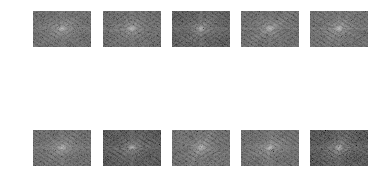

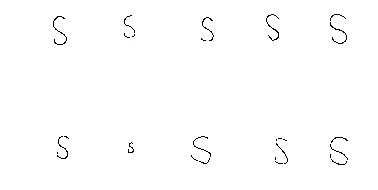

In [25]:
showffts(Ss)

/home/gregory/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


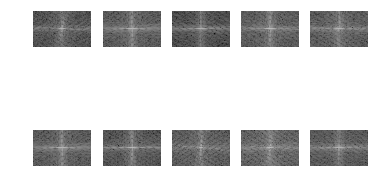

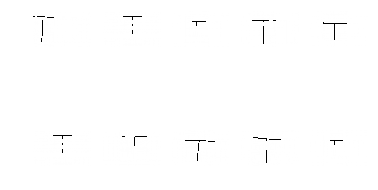

In [26]:
showffts(Ts)

/home/gregory/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


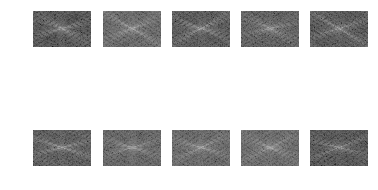

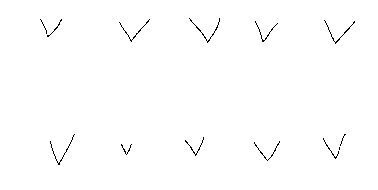

In [27]:
showffts(Vs)

In [74]:
def SPow (q, ra, rb):
    power = 0
    for u, column in enumerate(q):
        for v, element in enumerate(column):
            u = (u + len(q)/2)%len(q)
            v = (v + len(column)/2)%len(column)
            if -rb <= u and u <= rb and (np.sqrt(ra**2 - u**2) <= v or -np.sqrt(ra**2 - u**2) <= v) and (v <= np.sqrt(rb**2 - u**2) or v <= -np.sqrt(rb**2 - u**2)):
                power += np.log(np.absolute(element) + 1)**2
    return power
    
def TPow (q, r, d):
    power = 0
    for u, column in enumerate(q):
        for v, element in enumerate(column):
            u = (u + len(q)/2)%len(q)
            v = (v + len(column)/2)%len(column)
            if u**2 + v**2 == r and u != 0 and -(d/2) <= np.arctan(v/u) and np.arctan(v/u) <= +(d/2):
                power += np.log(np.absolute(element) + 1)**2
    return power
        
    
def VPow (q, r, d):
    power = 0
    for u, column in enumerate(q):
        for v, element in enumerate(column):
            u = (u + len(q)/2)%len(q)
            v = (v + len(column)/2)%len(column)
            if u**2 + v**2 == r and u != 0 and (np.pi/4)-(d/2) <= np.arctan(v/u) and np.arctan(v/u) <= (np.pi/4)+(d/2):
                power += np.log(np.absolute(element) + 1)**2
    return power
    

In [81]:
SDat = np.transpose([[SPow(q, 100, 120), TPow(q, 100, np.pi/6), VPow(q, 100, np.pi/6)] for q in Ss])
TDat = np.transpose([[SPow(q, 100, 120), TPow(q, 100, np.pi/6), VPow(q, 100, np.pi/6)] for q in Ts])
VDat = np.transpose([[SPow(q, 100, 120), TPow(q, 100, np.pi/6), VPow(q, 100, np.pi/6)] for q in Vs])

/home/gregory/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


[[  8.02779575e+05   7.79013085e+05   7.85101734e+05   7.70959819e+05
    8.04517645e+05   7.81102905e+05   7.24851241e+05   8.17739033e+05
    7.91579822e+05   8.31767029e+05]
 [  1.30224502e+02   1.30214511e+02   1.48732136e+02   1.31468440e+02
    1.37087036e+02   1.31903384e+02   1.16081910e+02   1.57636901e+02
    1.00996682e+02   1.50467495e+02]
 [  3.16885011e+02   2.73891287e+02   3.06994714e+02   2.65973555e+02
    2.82336692e+02   3.01936866e+02   2.52341396e+02   3.11493128e+02
    3.03710332e+02   2.87554464e+02]]
[[  7.44034519e+05   6.84477016e+05   6.49852472e+05   6.87726924e+05
    6.73066188e+05   6.84477016e+05   6.99823208e+05   7.45421122e+05
    7.43916909e+05   6.32897166e+05]
 [  1.56472580e+02   1.66240129e+02   1.70802985e+02   1.70925357e+02
    1.72263641e+02   1.66240129e+02   1.78087991e+02   1.70377386e+02
    1.61523869e+02   1.59415911e+02]
 [  2.37751060e+02   2.16778554e+02   2.35497017e+02   2.50641397e+02
    2.45083515e+02   2.16778554e+02   2.0639

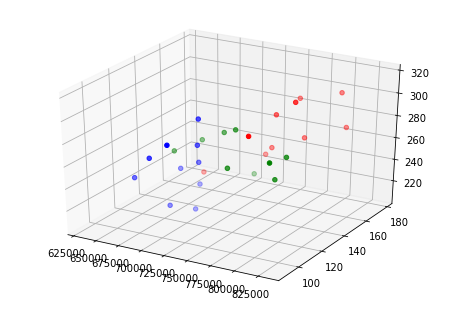

In [83]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter( SDat[0], SDat[1], SDat[2], color="r" )
ax.scatter( TDat[0], TDat[1], TDat[2], color="g" )
ax.scatter( VDat[0], VDat[1], VDat[2], color="b" )

plt.show()

fig = plt.figure()
ax = add_subplot(131)
ax.scatter( SDat[0], SDat[1], color="r" )
ax.scatter( TDat[0], TDat[1], color="g" )
ax.scatter( VDat[0], VDat[1], color="b" )

plt.show()
